#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


# 資料準備

In [2]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [7]:
model = Sequential()

#卷積層1
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

model.add(Dropout(rate=0.25))

model.add(MaxPooling2D(pool_size=(2, 2)))

#卷積層2與池化層2
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

model.add(Dropout(0.25))

model.add(MaxPooling2D(pool_size=(2, 2)))

#建立神經網路(平坦層、隱藏層、輸出層)
model.add(Flatten())
model.add(Dropout(rate=0.25))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

model.add(Dense(10, activation='softmax'))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



In [8]:
#檢查model 的STACK
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

# 載入之前訓練的模型

In [9]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
#定義一個繪圖函數
def show_train_history(train_history,train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend([train_acc, test_acc], loc='upper left')
    plt.show()

binary_crossentropy

In [12]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
BC_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)         

#[validation_split = 0.2] validation_split：在0和1之間浮動。用作驗證數據的訓練數據的分數。
#該模型將訓練數據的這一部分分開，不會對其進行訓練，並將在每個時期結束時評估該數據的損失和任何模型指標。
#[batch_size]：整數或None。每個梯度更新的樣本數。指定，batch_size為128



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 12s 330us/step - loss: 0.3248 - acc: 0.9000 - val_loss: 0.3224 - val_acc: 0.9000
Epoch 2/12
37500/37500 [==============================] - 9s 250us/step - loss: 0.3215 - acc: 0.9000 - val_loss: 0.3203 - val_acc: 0.9000
Epoch 3/12
37500/37500 [==============================] - 10s 265us/step - loss: 0.3182 - acc: 0.9000 - val_loss: 0.3176 - val_acc: 0.9000
Epoch 4/12
37500/37500 [==============================] - 9s 248us/step - loss: 0.3140 - acc: 0.9000 - val_loss: 0.3140 - val_acc: 0.9000
Epoch 5/12
37500/37500 [==============================] - 9s 251us/step - loss: 0.3089 - acc: 0.9000 - val_loss: 0.3094 - val_acc: 0.9000
Epoch 6/12
37500/37500 [==============================] - 9s 249us/step - loss: 0.3035 - acc: 0.9001 - val_loss: 0.3049 - val_acc: 0.9000
Epoch 7/12
37500/37500 [

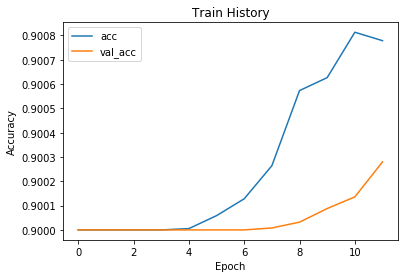

In [13]:
show_train_history(BC_history,'acc','val_acc')

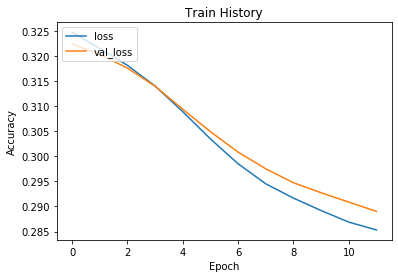

In [14]:
show_train_history(BC_history,'loss','val_loss')

MSE

In [15]:
model.compile(loss='MSE', optimizer='sgd', metrics=['accuracy'])
MSE_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)    

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 10s 268us/step - loss: 0.0814 - acc: 0.3021 - val_loss: 0.0825 - val_acc: 0.3266
Epoch 2/12
37500/37500 [==============================] - 10s 257us/step - loss: 0.0812 - acc: 0.3067 - val_loss: 0.0824 - val_acc: 0.3290
Epoch 3/12
37500/37500 [==============================] - 10s 256us/step - loss: 0.0811 - acc: 0.3093 - val_loss: 0.0822 - val_acc: 0.3308
Epoch 4/12
37500/37500 [==============================] - 10s 255us/step - loss: 0.0809 - acc: 0.3125 - val_loss: 0.0822 - val_acc: 0.3322
Epoch 5/12
37500/37500 [==============================] - 10s 263us/step - loss: 0.0807 - acc: 0.3152 - val_loss: 0.0820 - val_acc: 0.3355
Epoch 6/12
37500/37500 [==============================] - 10s 258us/step - loss: 0.0807 - acc: 0.3117 - val_loss: 0.0819 - val_acc: 0.3350
Epoch 7/12
37500/37500 [==============================] - 9s 253us/step - loss: 0.0806 - acc: 0.3163 - val_loss: 0.0

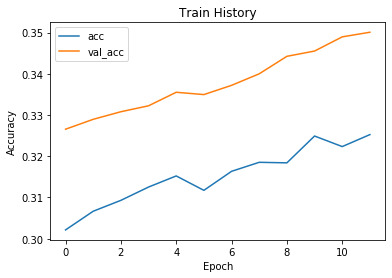

In [16]:
show_train_history(MSE_history,'acc','val_acc')

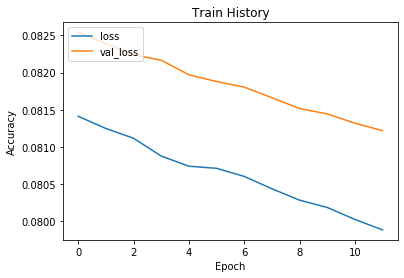

In [17]:
show_train_history(MSE_history,'loss','val_loss')